# Decision Tree
 
Assignment


## About the data: 
## Let’s consider a Company dataset with around 10 variables and 400 records. 
## The attributes are as follows: 
* **Sales -- Unit sales (in thousands) at each location**
* **Competitor Price -- Price charged by competitor at each location**
* **Income -- Community income level (in thousands of dollars)**
* **Advertising -- Local advertising budget for company at each location (in thousands of dollars)**
* **Population -- Population size in region (in thousands)**
* **Price -- Price company charges for car seats at each site**
* **Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site**
* **Age -- Average age of the local population**
* **Education -- Education level at each location**
* **Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location**
* **US -- A factor with levels No and Yes to indicate whether the store is in the US or not**

The company dataset looks like this: 
 
## Problem Statement:
## A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
## Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Company_Data.csv')

In [4]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


* There is no null values present inthis dataset.
* There are 8 numerical columns and 3 categorical variable.

In [6]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
df.duplicated().sum()

0

* There is no duplicates are present.

In [8]:
df.shape

(400, 11)

* There are 400 data points with 11 columns.

In [9]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## Let's Explore Columns

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set_style('whitegrid')

### 1. CompPrice Column

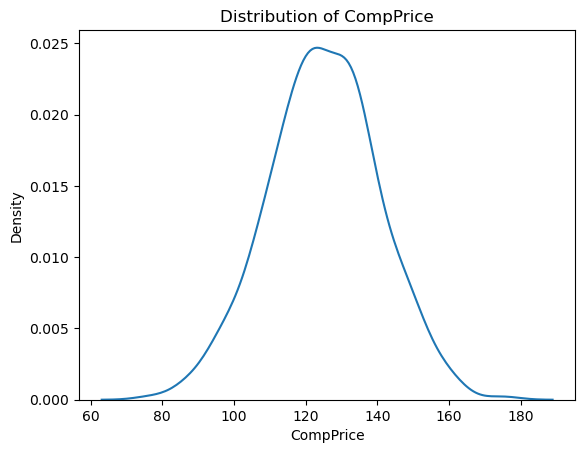

In [11]:
sns.distplot(df['CompPrice'], hist=False)
plt.title('Distribution of CompPrice')
plt.show()

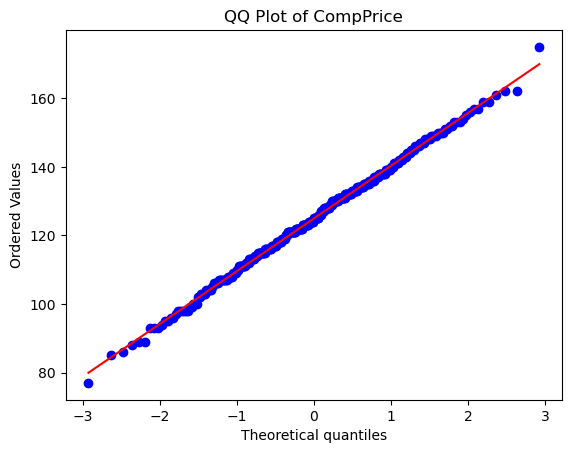

In [12]:
stats.probplot(df['CompPrice'], dist="norm", plot=plt)
plt.title('QQ Plot of CompPrice')
plt.show()

* We can see all the data points lies on straight line so, data is normally distributed.

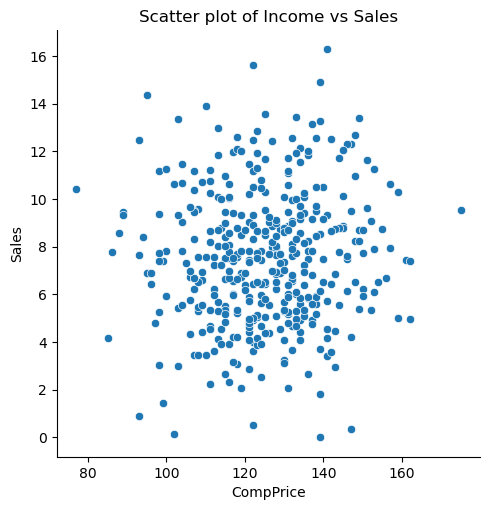

In [13]:
sns.relplot(x='CompPrice',y='Sales',kind='scatter',data=df)
plt.title('Scatter plot of Income vs Sales')
plt.show()

### 2. Income column

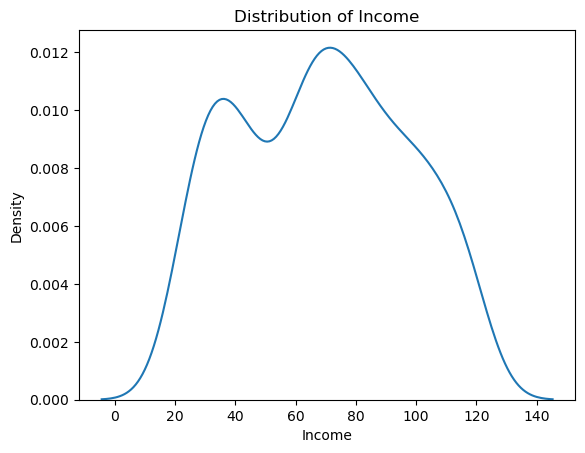

In [14]:
sns.distplot(df['Income'], hist=False)
plt.title('Distribution of Income')
plt.show()

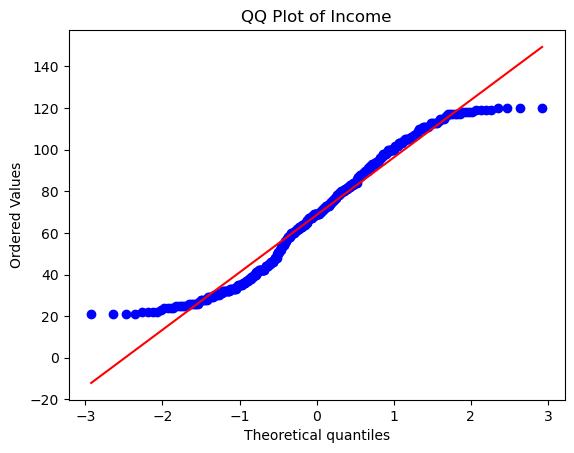

In [15]:
stats.probplot(df['Income'], dist='norm', plot=plt)
plt.title('QQ Plot of Income')
plt.show()

* Data is not Fully normally distributed but it is like normal distribution.

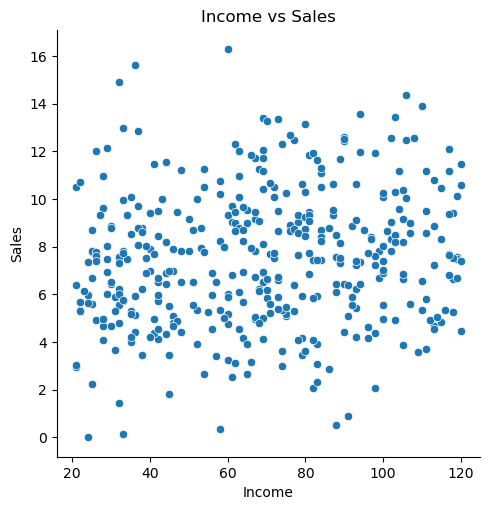

In [16]:
sns.relplot(x='Income', y='Sales', kind='scatter',data=df)
plt.title('Income vs Sales')
plt.show()

### 3. Advertising column

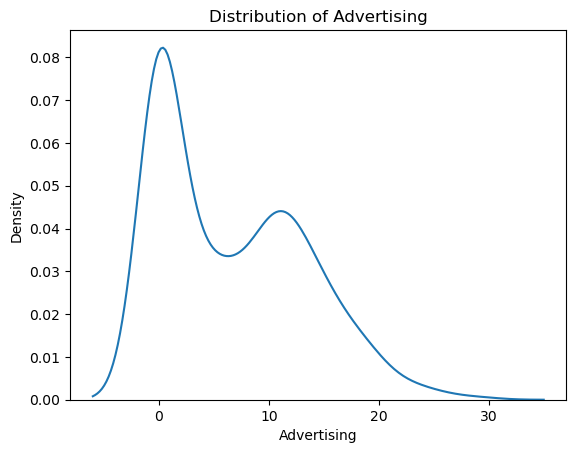

In [17]:
sns.distplot(df['Advertising'], hist=False)
plt.title('Distribution of Advertising')
plt.show()

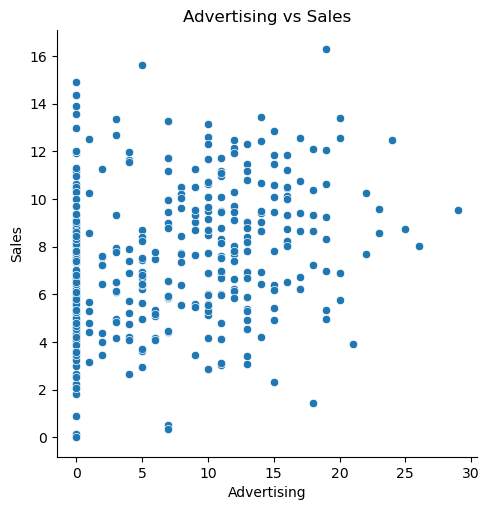

In [18]:
sns.relplot(x='Advertising', y='Sales',kind='scatter',data=df)
plt.title('Advertising vs Sales')
plt.show()

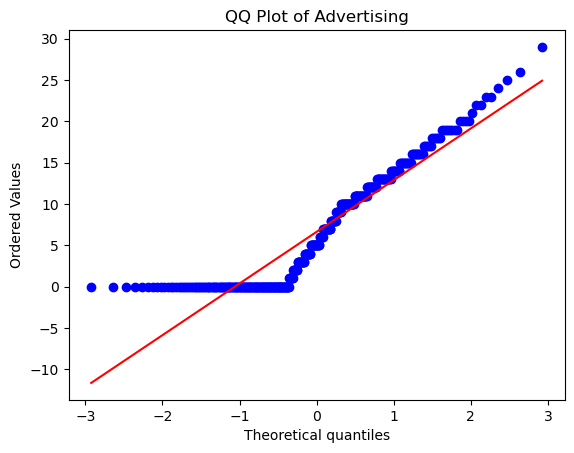

In [19]:
stats.probplot(df['Advertising'],dist='norm',plot=plt)
plt.title('QQ Plot of Advertising')
plt.show()

* We can see above QQ Plot data is not normally distributed.

In [20]:
### 4. 
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

### 4. Population Column

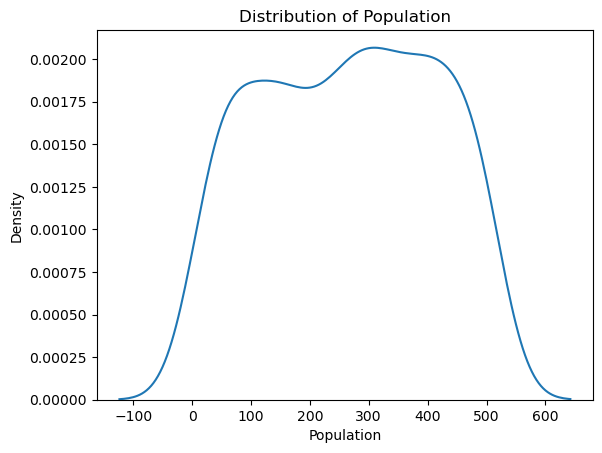

In [21]:
sns.distplot(df['Population'],hist=False)
plt.title('Distribution of Population')
plt.show()

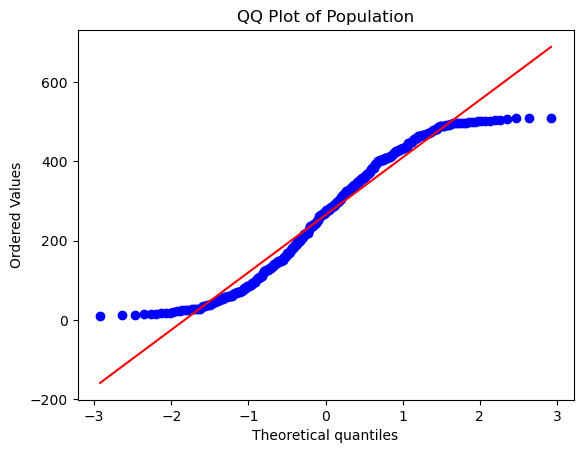

In [22]:
stats.probplot(df['Population'], dist='norm',plot=plt)
plt.title('QQ Plot of Population')
plt.show()

* Data is not fully but tending to normal distribution.

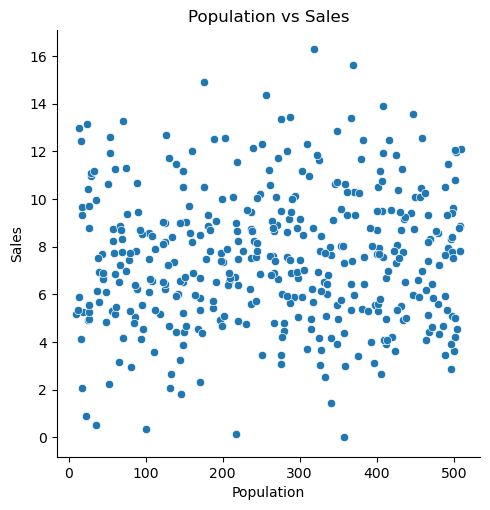

In [23]:
sns.relplot(x='Population', y='Sales', data=df)
plt.title('Population vs Sales')
plt.show()

In [24]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

### 5. Price Column

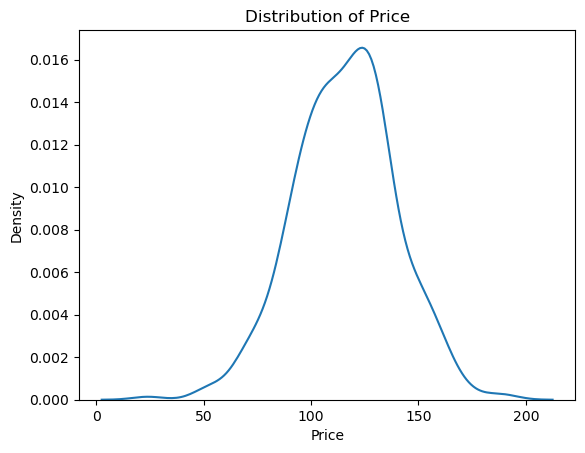

In [25]:
sns.distplot(df['Price'], hist=False)
plt.title('Distribution of Price')
plt.show()

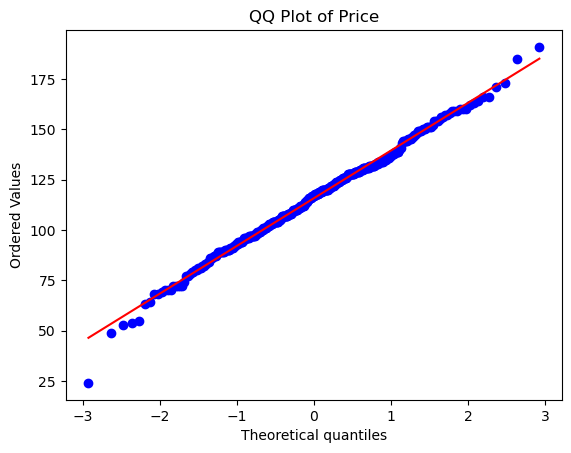

In [26]:
stats.probplot(df['Price'], dist='norm',plot=plt)
plt.title('QQ Plot of Price')
plt.show()

* We can easily see in QQ Plot our data is normally distribution.

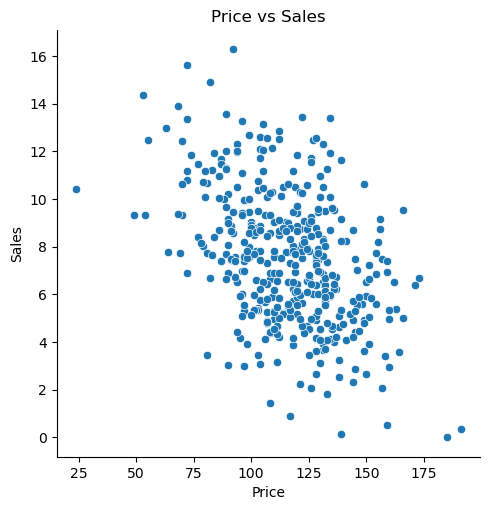

In [27]:
sns.relplot(x='Price',y='Sales',kind='scatter',data=df)
plt.title('Price vs Sales')
plt.show()

* We can see as price increasing Sales decreasing.

### 6. ShelveLoc Column

In [28]:
f = df['ShelveLoc'].value_counts()
f

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

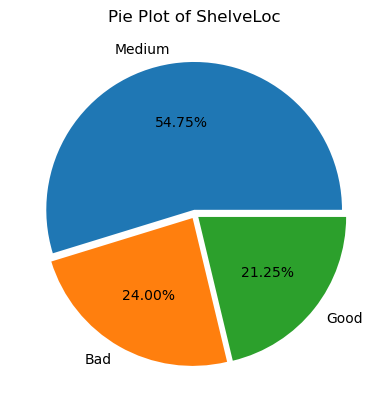

In [29]:
plt.pie(f.values, labels=f.keys(), autopct='%0.2f%%',explode=[0.03,0.03,0.03])
plt.title('Pie Plot of ShelveLoc')
plt.show()

* Approx 55% ShelveLoc belongs to Medium category, 24% ShelveLoc belongs to Bad and 21% ShelveLoc belongs to Good category.

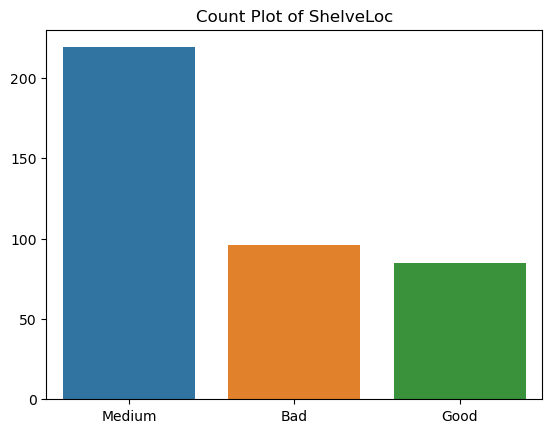

In [30]:
sns.barplot(x=f.keys(),y=f.values)
plt.title('Count Plot of ShelveLoc')
plt.show()

* Maximum ShelveLoc belongs to Medium category and least belongs to Good.

In [31]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

### 7. Age Column

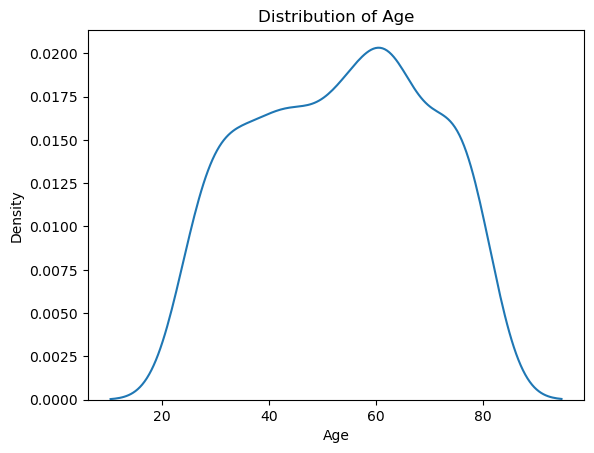

In [32]:
sns.distplot(df['Age'], hist=False)
plt.title('Distribution of Age')
plt.show()

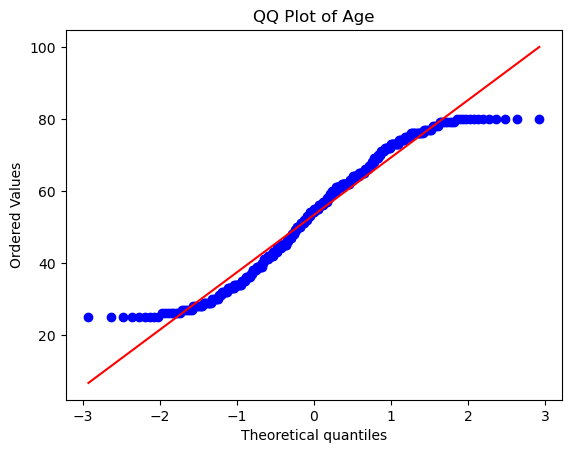

In [33]:
stats.probplot(df['Age'], dist='norm', plot=plt)
plt.title('QQ Plot of Age')
plt.show()

* Data is not partially normal distributed.

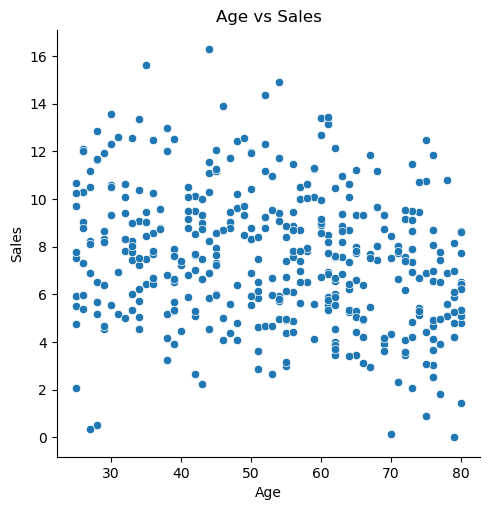

In [34]:
sns.relplot(x='Age',y='Sales',kind='scatter',data=df)
plt.title('Age vs Sales')
plt.show()

### 8. Education Column

In [35]:
f1 = df['Education'].value_counts()

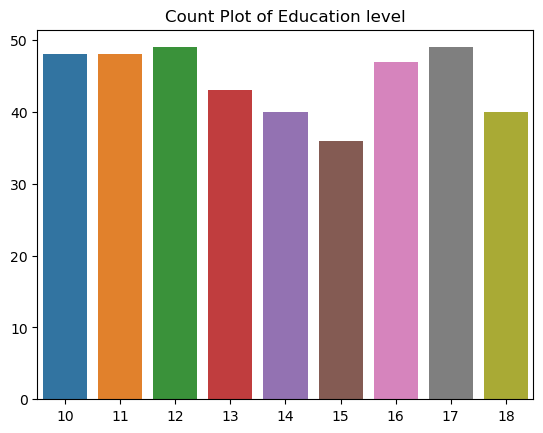

In [36]:
sns.barplot(x=f1.keys(),y=f1.values)
plt.title('Count Plot of Education level')
plt.show()

*  17, 16, 10, 12, 11 are the top five Education level.

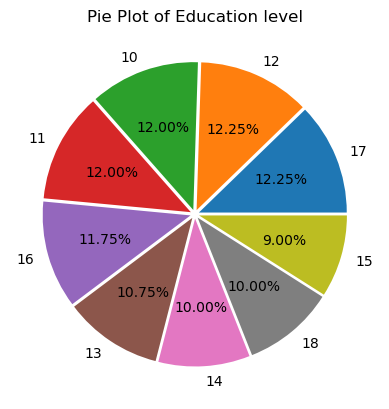

In [37]:
plt.pie(f1.values, labels=f1.keys(),
        autopct='%0.2f%%',
       explode=[0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03])
plt.title('Pie Plot of Education level')
plt.show()

* Most of the people belongs to Education level 17 and 12, least of the people belongs to Education level 15

In [38]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

### 9. Urban Column

In [39]:
f2 = df['Urban'].value_counts()

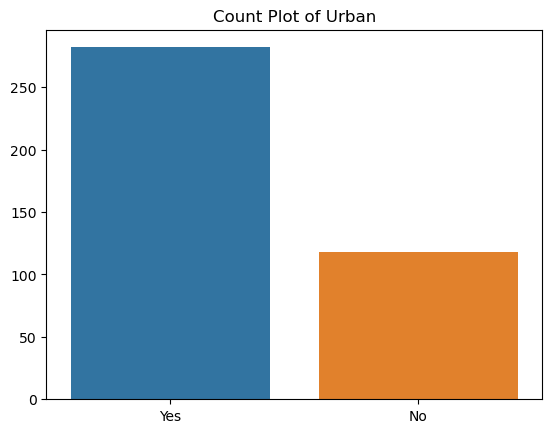

In [40]:
sns.barplot(x=f2.keys(),y=f2.values)
plt.title('Count Plot of Urban')
plt.show()

* Majority of people belongs to Urban Area.

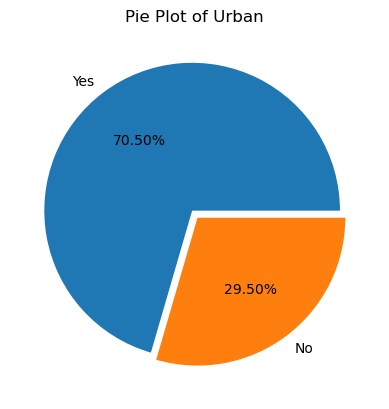

In [41]:
plt.pie(f2.values, labels=f2.keys(), autopct='%0.2f%%', explode=[0.03,0.03])
plt.title('Pie Plot of Urban')
plt.show()

* Approx 70% people belongs to Urban Area and approx 30% peoples are belongs to Non-Urban.

In [42]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

### 10. US Cloumn

In [43]:
f3 = df['US'].value_counts()

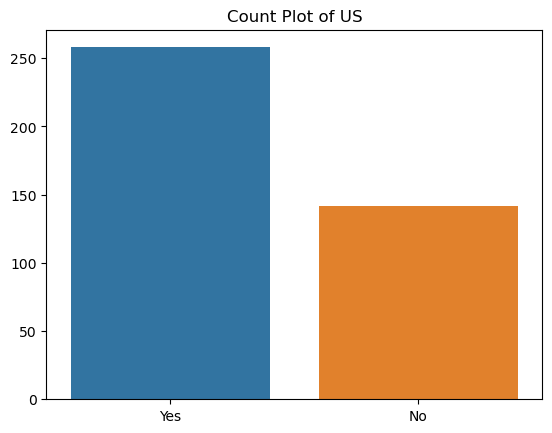

In [44]:
sns.barplot(x=f3.keys(),y=f3.values)
plt.title('Count Plot of US')
plt.show()

* We can see in the above barplot More number of stores belongs to US. 

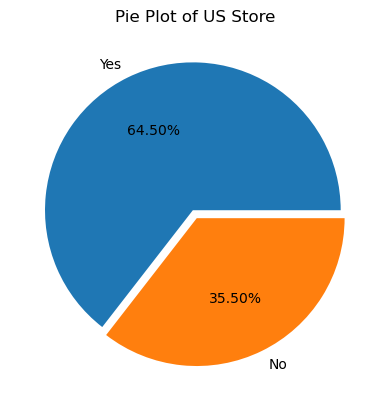

In [45]:
plt.pie(f3.values, labels=f3.keys(), autopct='%0.2f%%', explode=[0.03,0.03])
plt.title('Pie Plot of US Store')
plt.show()

* 64.50% stores are present in US and 35.50% stores are present outside of US.

## Let's search the columns that contribute to more in Sales

In [166]:
corr = df.corr()
corr

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


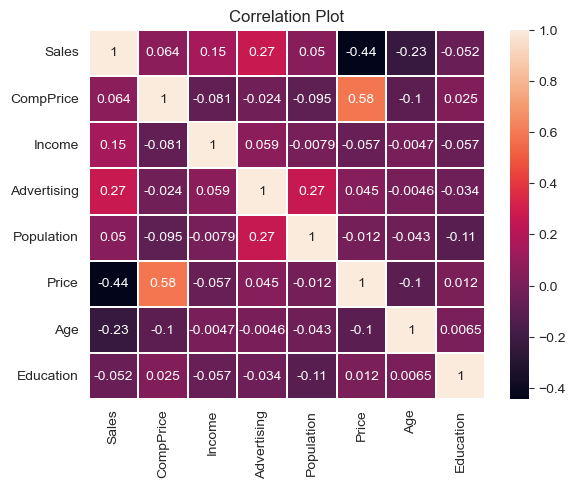

In [167]:
sns.heatmap(corr, annot=True, linewidth=0.1)
plt.title('Correlation Plot')
plt.show()

* We can see in the above heatmap
* Price and sales negatively correlated as price increases Sales decreases.
* Advertising and sales are positively correlated as we do more Advertising Sales increases.

In [169]:
grp1 = df[['Education','Sales']].groupby('Education').sum().sort_values('Sales',ascending=False)

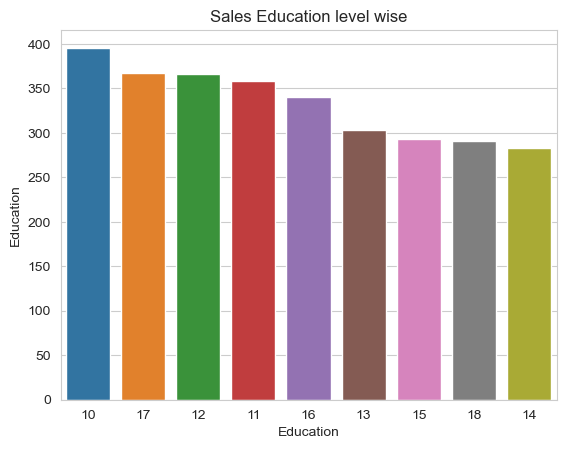

In [148]:
sns.barplot(x=grp1.index, y=grp1['Sales'], order=grp1.index)
plt.title('Sales Education level wise')
plt.ylabel('Education')
plt.show()

* In the above barplot we can see Education level 10 having highest sale.
* Education level 17 have second most highest sales.
* Top 5 education level according to most sales are 10, 17, 12, 11, 16.

In [135]:
grp = df[['Age', 'Sales']].groupby('Age').sum()[:10].sort_values('Sales',ascending=False)

In [138]:
grp['Sales']

Age
26    70.91
34    69.05
33    64.39
25    64.17
30    61.83
28    54.05
29    52.68
32    51.20
27    45.23
31    24.73
Name: Sales, dtype: float64

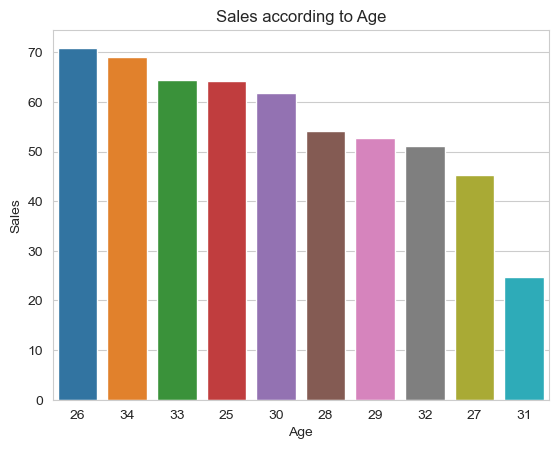

In [140]:
sns.barplot(x=grp.index, y=grp['Sales'], order = grp.index)
plt.title('Sales according to Age')
plt.xlabel('Age')
plt.show()

* The people of age 26 having the highest sales.
* Also people of age 34 is the second most highest sales.
* Above plot showing Top 10 highest sales 'Age' wise.

In [156]:
grp3 = df[['Urban','Sales']].groupby('Urban').sum()

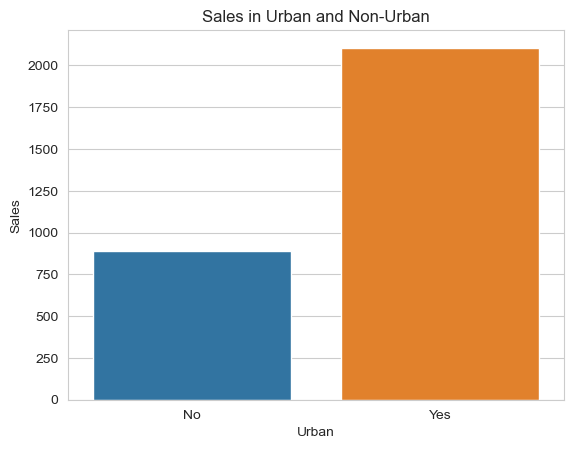

In [161]:
sns.barplot(x=grp3.index, y=grp3['Sales'], order = grp3.index)
plt.title('Sales in Urban and Non-Urban')
plt.show()

* We can see the store present in Urban area producing more sales compare to non-urban areas.

In [163]:
grp4 = df[['US','Sales']].groupby('US').sum()

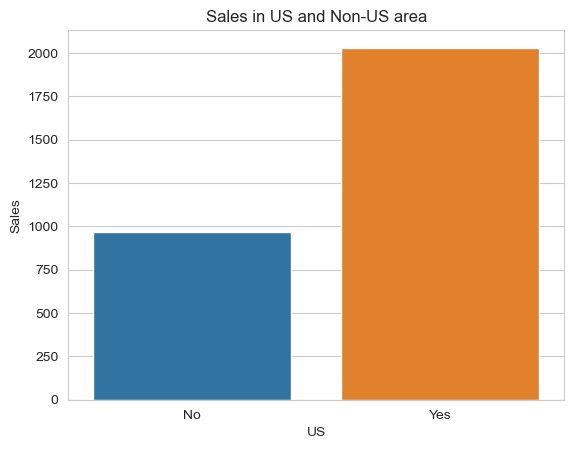

In [162]:
sns.barplot(x=grp4.index, y=grp4['Sales'], order=grp4.index)
plt.title('Sales in US and Non-US area')
plt.show()

* We can see in the above barplot the stores present in US producing mero sales compare to Non-US.

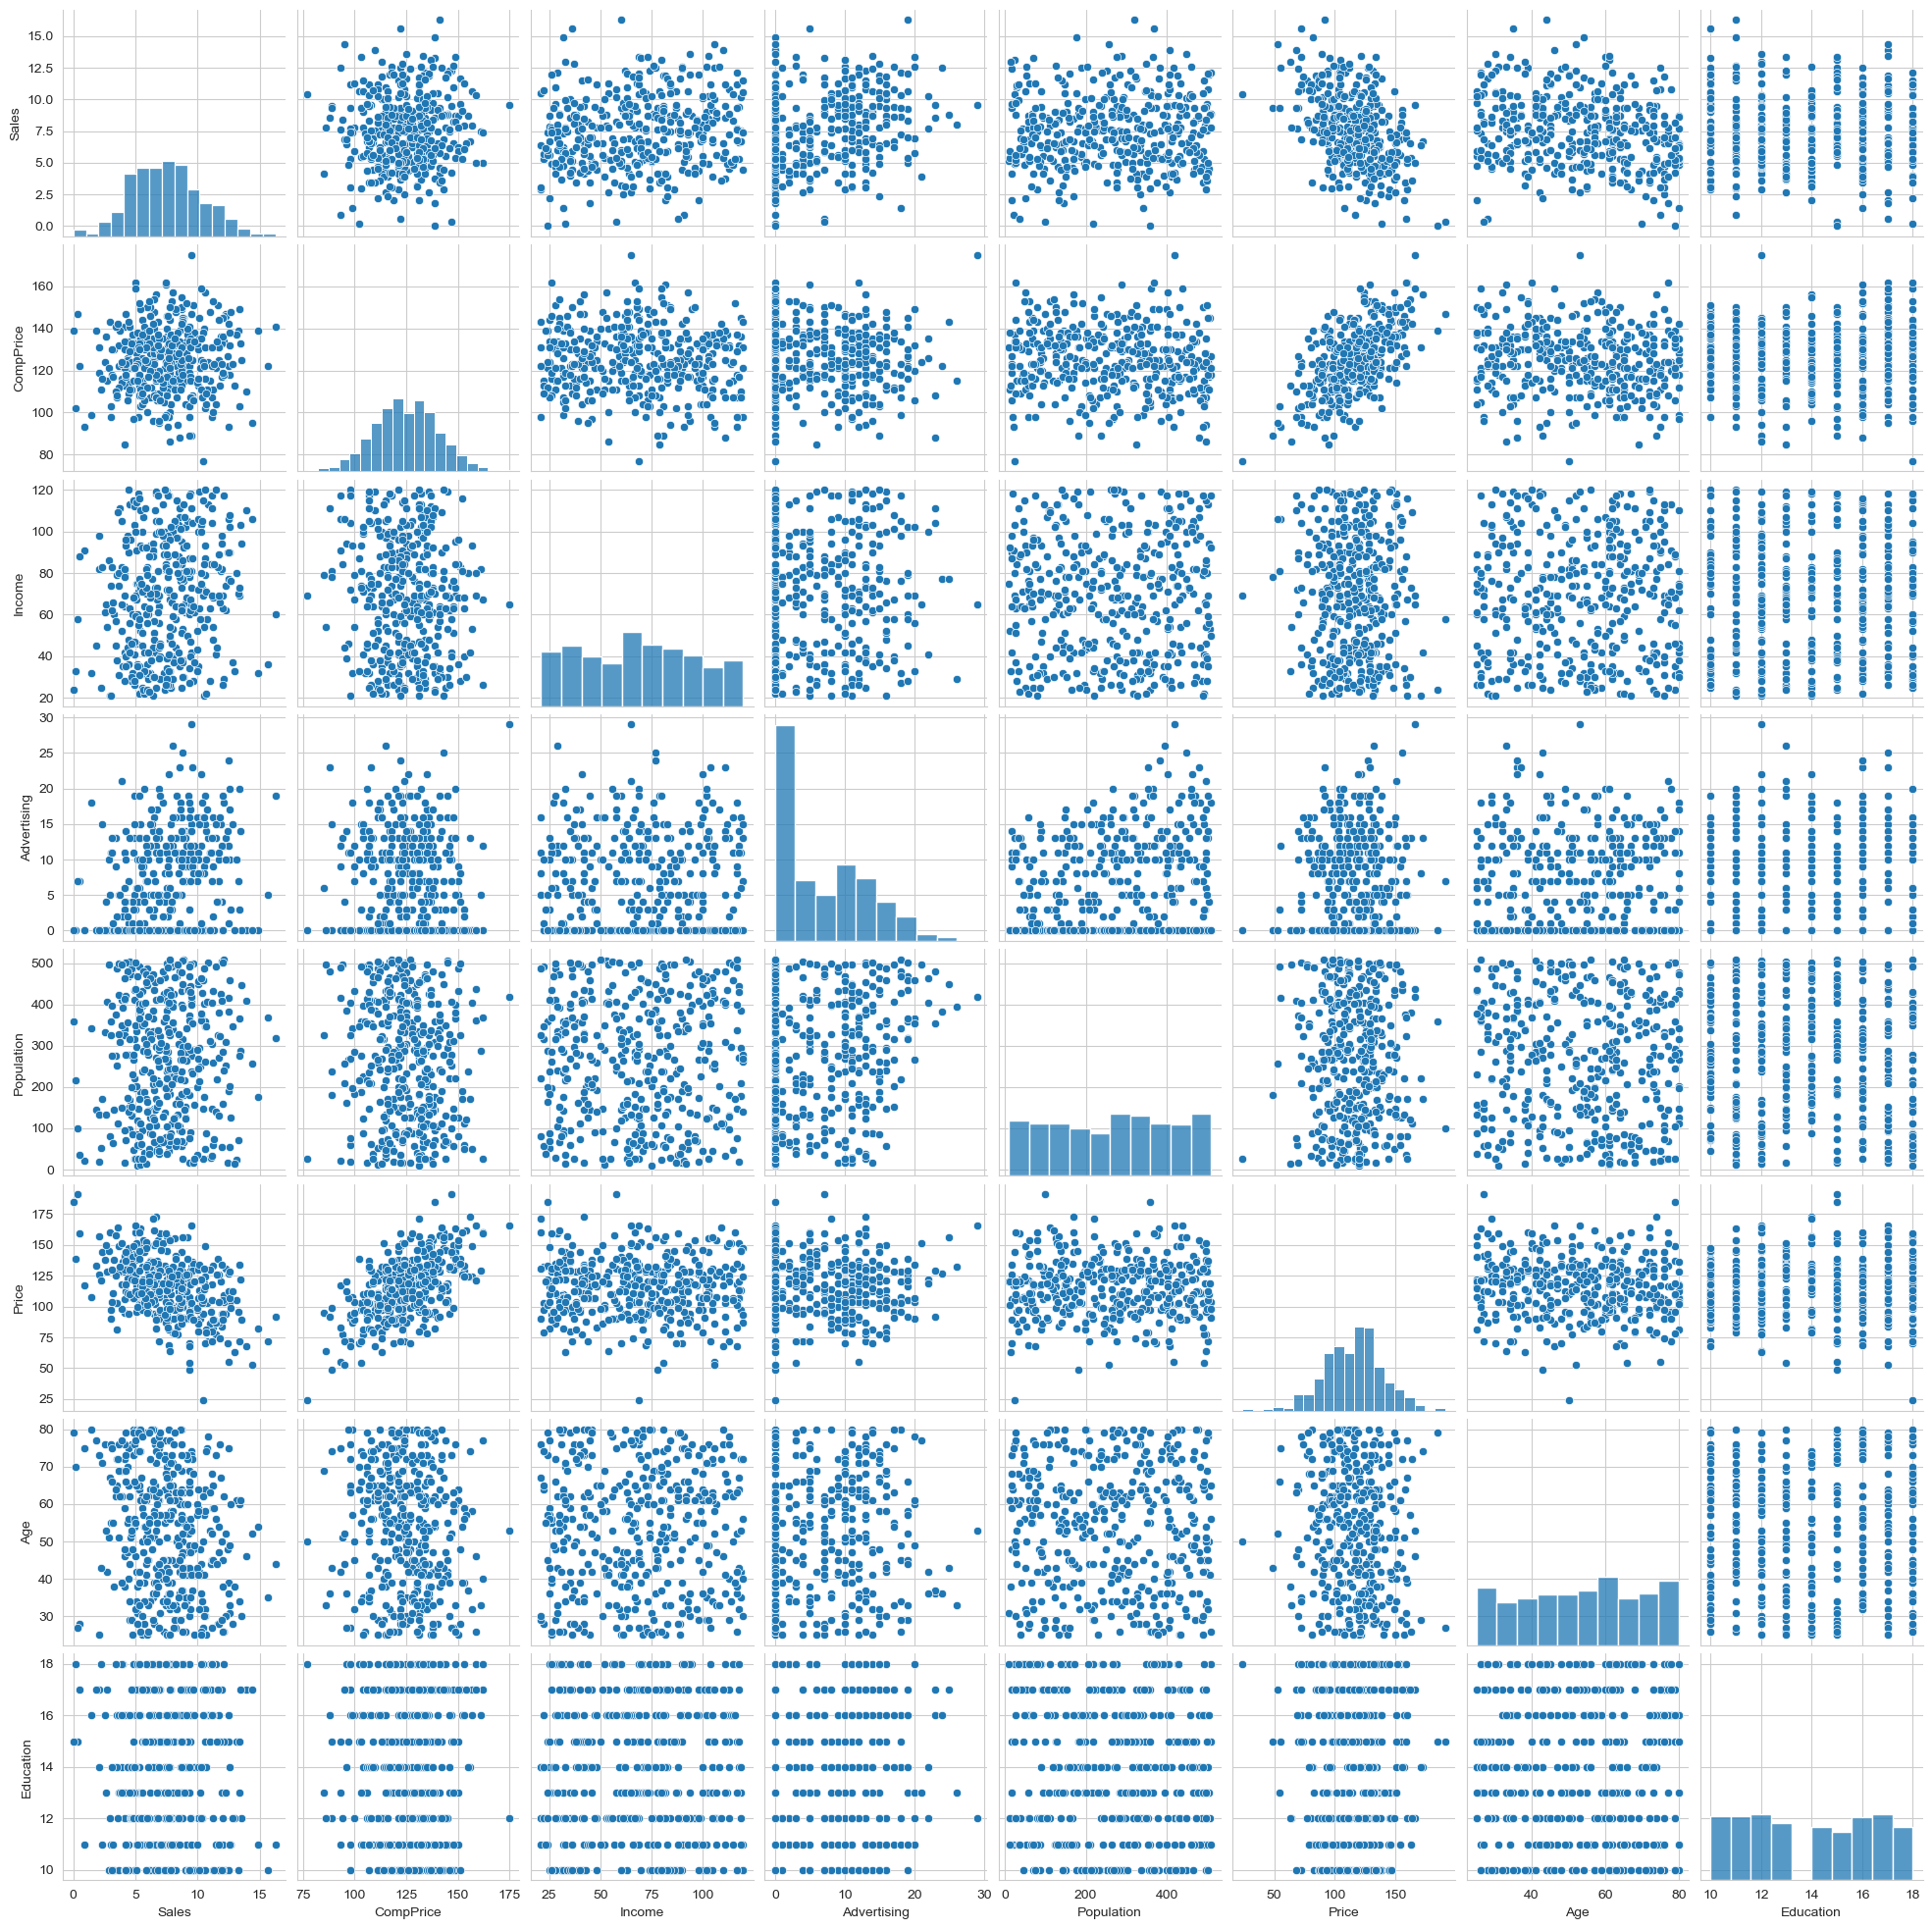

In [170]:
sns.pairplot(df)
plt.show()

## Let's check for outliers

In [73]:
numerical_columns = [col for col in df.columns if df[col].dtypes != 'object']
numerical_columns

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education']

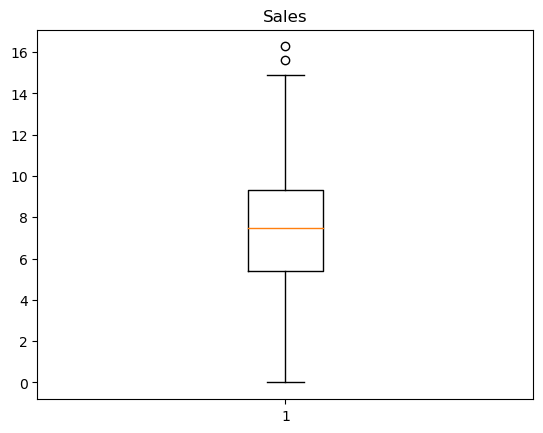

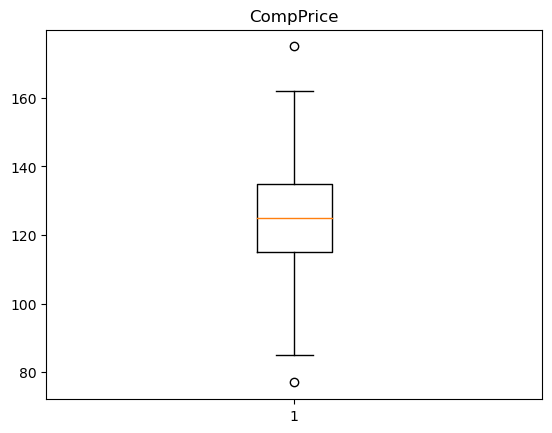

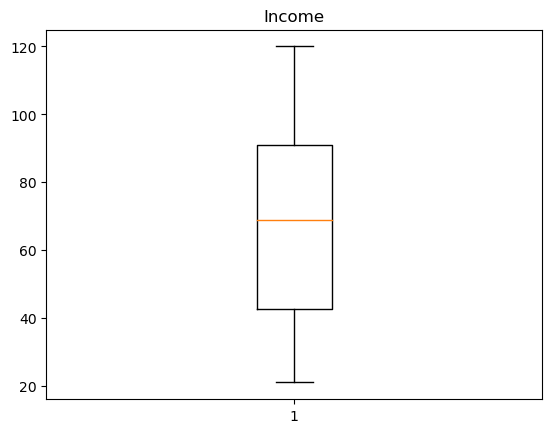

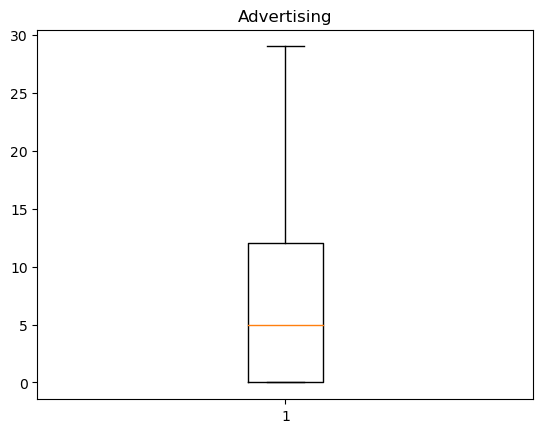

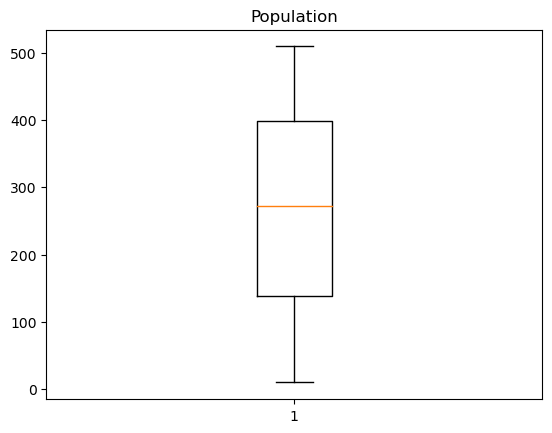

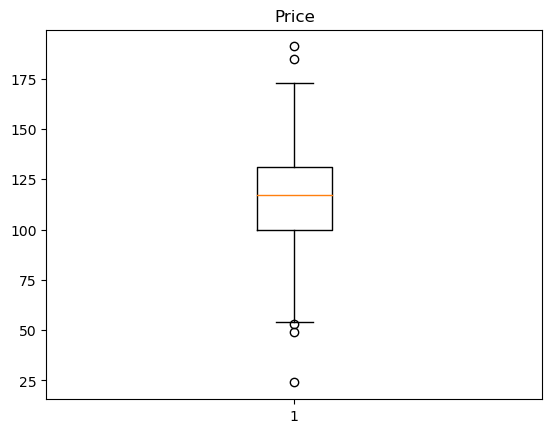

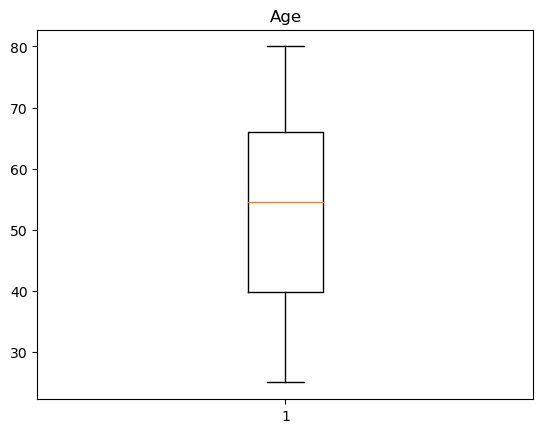

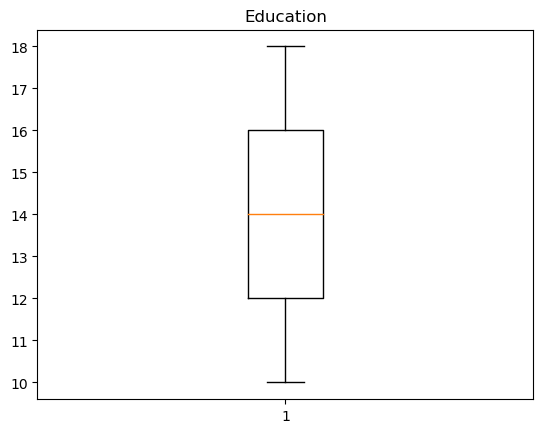

In [76]:
for col in numerical_columns:
    fig, ax = plt.subplots()
    ax.boxplot(df[col])
    plt.title(col)
    plt.show()

## Let's do the Label Encoding

In [46]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

### Ordinal Encoding of 'ShelveLoc' Column

In [47]:
oe = OrdinalEncoder(categories=[['Bad', 'Medium', 'Good']])

In [189]:
data = df.copy()

In [190]:
data['ShelveLoc'] =oe.fit_transform(data[['ShelveLoc']])

In [191]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0.0,42,17,Yes,Yes
1,11.22,111,48,16,260,83,2.0,65,10,Yes,Yes
2,10.06,113,35,10,269,80,1.0,59,12,Yes,Yes
3,7.40,117,100,4,466,97,1.0,55,14,Yes,Yes
4,4.15,141,64,3,340,128,0.0,38,13,Yes,No


### Label Encoding of Urban and US

In [192]:
le = LabelEncoder()

In [193]:
data['Urban'] = le.fit_transform(data['Urban'])

In [194]:
data['US'] = le.fit_transform(data['US'])

In [195]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0.0,42,17,1,1
1,11.22,111,48,16,260,83,2.0,65,10,1,1
2,10.06,113,35,10,269,80,1.0,59,12,1,1
3,7.40,117,100,4,466,97,1.0,55,14,1,1
4,4.15,141,64,3,340,128,0.0,38,13,1,0


* Our data set is now ready to fit in the model.

### Let's convert Sales into Categorical column

In [196]:
label = []
mean_sales = data['Sales'].mean()
for i in data['Sales']:
    if i < mean_sales:
        label.append('Bad')
    else:
        label.append('Good')

In [198]:
data['Sales'] = label

In [199]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Good,138,73,11,276,120,0.0,42,17,1,1
1,Good,111,48,16,260,83,2.0,65,10,1,1
2,Good,113,35,10,269,80,1.0,59,12,1,1
3,Bad,117,100,4,466,97,1.0,55,14,1,1
4,Bad,141,64,3,340,128,0.0,38,13,1,0


In [200]:
data['Sales'].value_counts()

Bad     201
Good    199
Name: Sales, dtype: int64

* We can see data is balanced

### Let's split the data

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
x = data.drop(columns=['Sales'])
y = data['Sales']

In [212]:
x[:3],y[:3]

(   CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
 0        138      73           11         276    120        0.0   42   
 1        111      48           16         260     83        2.0   65   
 2        113      35           10         269     80        1.0   59   
 
    Education  Urban  US  
 0         17      1   1  
 1         10      1   1  
 2         12      1   1  ,
 0    Good
 1    Good
 2    Good
 Name: Sales, dtype: object)

In [213]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [214]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((320, 10), (80, 10), (320,), (80,))

### Let's Build the Model

In [215]:
from sklearn.tree import DecisionTreeClassifier

In [216]:
clf = DecisionTreeClassifier(max_depth = 10)

In [217]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [219]:
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

In [222]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [225]:
test_accuracy = accuracy_score(y_test, test_pred)
train_accuracy = accuracy_score(y_train, train_pred)

In [226]:
test_accuracy, train_accuracy

(0.725, 0.99375)

In [227]:
print('Confusion matrix for test data')
confusion_matrix(y_test, test_pred)

Confusion matrix for test data


array([[28,  9],
       [13, 30]], dtype=int64)

* our model is not performing well in test data

In [228]:
print('Confusion matrix for train data')
confusion_matrix(y_train, train_pred)

Confusion matrix for train data


array([[163,   1],
       [  1, 155]], dtype=int64)

* Our model perform well in train data that means our model is overfitted.

In [230]:
print('classification_report for test data')
print(classification_report(y_test, test_pred))

classification_report for test data
              precision    recall  f1-score   support

         Bad       0.68      0.76      0.72        37
        Good       0.77      0.70      0.73        43

    accuracy                           0.73        80
   macro avg       0.73      0.73      0.72        80
weighted avg       0.73      0.72      0.73        80



In [231]:
print('Classification_report for train data')
print(classification_report(y_train, train_pred))

Classification_report for train data
              precision    recall  f1-score   support

         Bad       0.99      0.99      0.99       164
        Good       0.99      0.99      0.99       156

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320



## Let's do GridSearchCV

In [249]:
from sklearn.model_selection import GridSearchCV

In [268]:
params = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':[8,10,12,14,16,18,20,25],
    'min_samples_split':[2,3,4,5,6,7,8,9,10],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9]
}

In [269]:
clf = DecisionTreeClassifier()

In [270]:
grid = GridSearchCV(clf, params, cv=10)

In [271]:
#grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [8, 10, 12, 14, 16, 18, 20, 25],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']})

In [272]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 18,
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'splitter': 'best'}

In [273]:
grid.best_score_

0.784375

## Let's build the model with hyperparameters suggested by GridSearchCV

In [277]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=18, min_samples_split=4, splitter='best', min_samples_leaf=5)

In [278]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=18, min_samples_leaf=5,
                       min_samples_split=4)

In [279]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [286]:

print(f'accuracy for train data: {accuracy_score(y_train, train_pred)}')

accuracy for train data: 0.921875


In [284]:
print(f'accuracy_score for test data: {accuracy_score(y_test, test_pred)}')

accuracy_score for test data: 0.75


### Let's plot the tree

In [288]:
from sklearn.tree import plot_tree

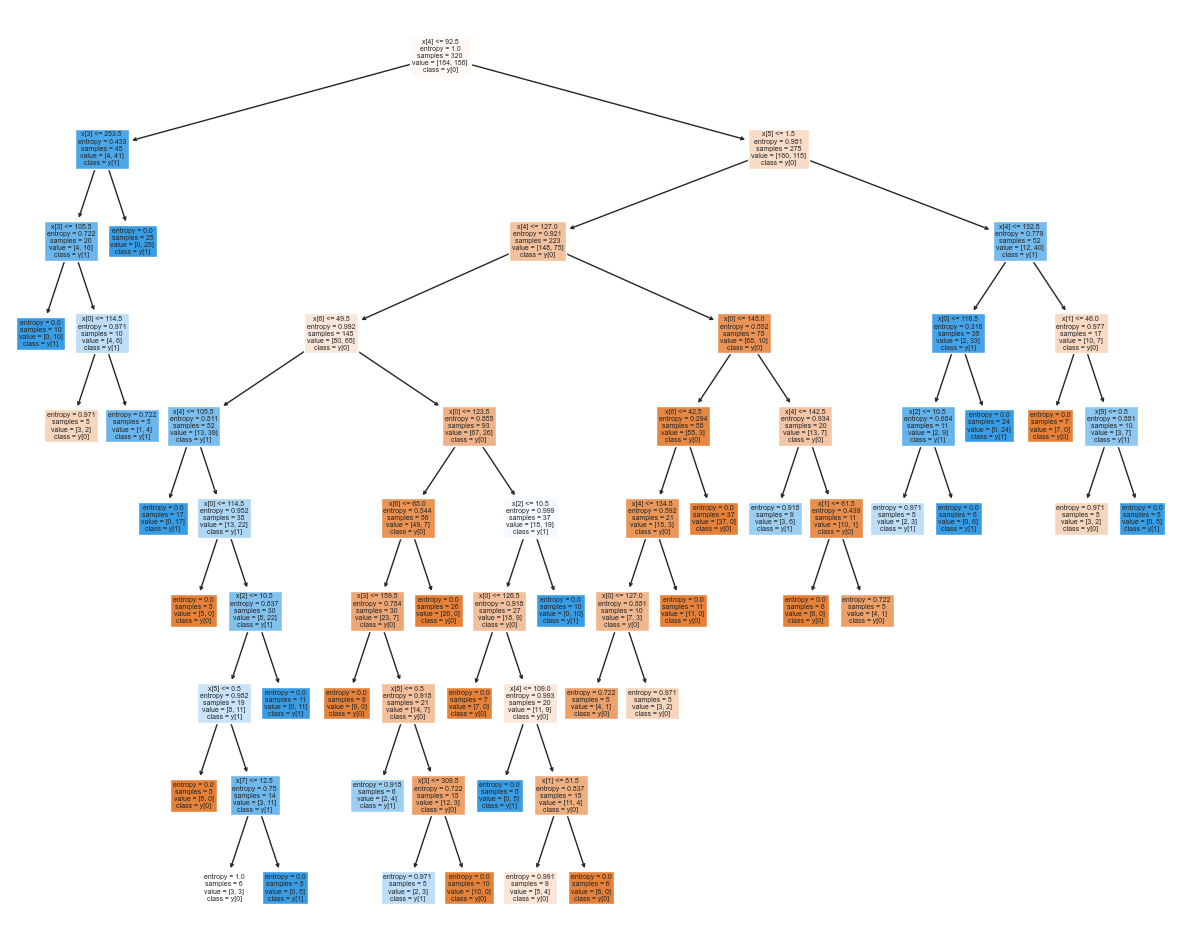

In [294]:
plt.figure(figsize=(15,12))
plot_tree(model, class_names=True, filled=True)
plt.show()

# Conclusion

* I have done EDA process in which I got some important results
1. Store present in Urban area producing more sales compare to non-urban areas.
2. Top 5 education level according to most sales are 10, 17, 12, 11, 16.
3. Stores present in US producing more sales compare to Non-US.
4. Price and Sales are negatively correlated as Price increases Sales goes down.
5. More Advertising gives the more sales.
6. I do GridsearchCV to finding best hyperparameters.